# K近邻法

### 1. 定义

* 给定一个训练数据集，对新的输入实例，在训练集中找到与该实例最近邻的k个实例，这k个实例的多数属于某个类，就把该输入实例分为这个类。
* 三要素：距离度量，k值选择，分类决策规则。

### 2. 算法流程

* 输入训练集，输出实例`x`所属的类`y`。
    * (1) 根据给定的距离度量，在训练集中找出与x最近邻的k个点，记作$N_k(x)$。
    * (2) 在$N_k(x)$中根据分类决策规则（多数表决）决定x的类别y。
  $$
  y=argmax_{c_j}\sum_{x_i\in N_k(x)}I(y_i=c_j)
  $$

### 3. 距离度量（常用的是欧式距离）

设特征空间$X$是n维实数向量空间$R$，$x_{i}, x_{j} \in \mathcal{X}$,$x_{i}=\left(x_{i}^{(1)}, x_{i}^{(2)}, \cdots, x_{i}^{(n)}\right)^{\mathrm{T}}$,$x_{j}=\left(x_{j}^{(1)}, x_{j}^{(2)}, \cdots, x_{j}^{(n)}\right)^{\mathrm{T}}$，则：$x_i$,$x_j$的$L_p$距离定义为:
$$
L_{p}\left(x_{i}, x_{j}\right)=\left(\sum_{i=1}^{n}\left|x_{i}^{(i)}-x_{j}^{(l)}\right|^{p}\right)^{\frac{1}{p}}
$$

* p = 1时，曼哈顿距离
* p = 2时，欧式距离
* p = $\infty$时，是各个坐标距离的最大值，也就是切比雪夫距离，即$L\infty = (x_i,x_j)=max_{l}|x_{i}^{(l)}-x_{j}^{(l)}|$

### 4. k值的选择

* 选择较小的k值，”学习“的近似误差会减小，只有与输入实例近似的训练实例才会对预测结果起作用，但缺点是”学习“的估计误差会增大，容易发生过拟合。
* 选择较大的k值，可以减少学习的估计误差，缺点是学习的近似误差会增大。

一般k值的选取取一个较小的值，采用交叉验证法来选取最优的k值。

### 5. 分类决策规则

* k近邻中的分类决策规则往往是多数表决，即由输入实例的k个邻近的训练实例中的多数类决定输入实例的类。

* 对给定的实例$x\in X$，其最近邻的k个训练实例点构成集合$N_k(x)$。如果涵盖$N_k(x)$的区域的类别是$c_j$，误分类率是
$$ \frac{1}{k}\sum_{x_i\in N_k(x)}I(y_i\ne c_j)=1-\frac{1}{k}\sum_{x_i\in N_k(x)}I(y_i = c_j) $$

要使误分类率最小即经验风险最小，就要使$\sum_{x_i\in N_k(x)}I(y_i = c_j)$最大，所以多数表决规则等价于经验风险最小化。

##### 例：$x_1=[1,1], x_2=[5,1], x_3=[4,4]$，求在$p$取不同值时，$L_p$距离下$x_1$的最近邻点。

In [1]:
x1 = [1,1]
x2 = [5,1]
x3 = [4,4]

In [4]:
import math
def L(x1, x, p):
    distance = 0
    for i in range(len(x1)):
        distance += math.pow(abs(x1[i] - x[i]), p)
    return math.pow(distance, 1 / p)

In [5]:
for i in range(1, 5):
    print('p = %d, x1 and x3 distance: ' % i, L(x1, x3, i))

p = 1, x1 and x3 distance:  6.0
p = 2, x1 and x3 distance:  4.242640687119285
p = 3, x1 and x3 distance:  3.7797631496846193
p = 4, x1 and x3 distance:  3.5676213450081633


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from collections import Counter

In [7]:
# data
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']

In [8]:
df

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


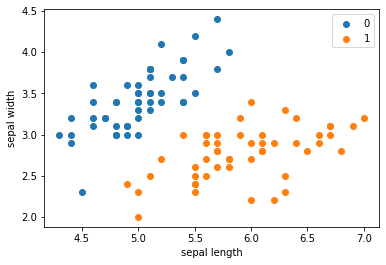

In [9]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [10]:
data = np.array(df.iloc[:100, [0, 1, -1]])
X, y = data[:,:-1], data[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [2]:
class KNN:
    def __init__(self, X_train, y_train, n_neighbors=3, p = 2):
        self.n = n_neighbors
        self.p = p
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self, X):
        # 取出n个点
        knn_list = []
        for i in range(self.n):
            dist = np.linalg.norm(X - self.X_train[i], ord=self.p)   # 计算欧式距离
            knn_list.append((dist, self.y_train[i]))
            
        for i in range(self.n, len(self.X_train)):
            max_index = knn_list.index(max(knn_list, key = lambda x : x[0]))
            dist = np.linalg.norm(X - self.X_train[i], ord=self.p)
            if knn_list[max_index][0] > dist:
                knn_list[max_index] = (dist, self.y_train[i])
                
        # 统计
        knn = [k[-1] for k in knn_list]
        count_pairs = Counter(knn)
        max_count = sorted(count_pairs.items(), key = lambda x : x[1])[-1][0]
        return max_count
    
    def score(self, X_test, y_test):
        right_count = 0
        n = 10
        for X, y in zip(X_test, y_test):
            label = self.predict(X)
            if label == y:
                right_count += 1
        return right_count / len(X_test)

In [43]:
clf = KNN(X_train, y_train)

In [44]:
clf.score(X_test, y_test)

1.0

In [48]:
test_point = [6.0, 3.0]
print('Test Point: {}'.format(clf.predict(test_point)))

Test Point: 1.0


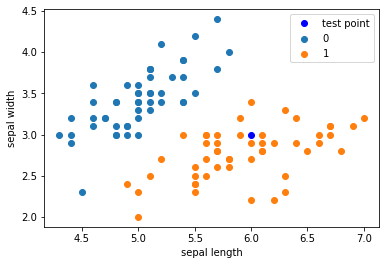

In [49]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.plot(test_point[0], test_point[1], 'bo', label='test point')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

### scikit-learn k近邻实例

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
clf_sk = KNeighborsClassifier()
clf_sk.fit(X_train, y_train)

KNeighborsClassifier()

In [52]:
clf_sk.score(X_test, y_test)

1.0

In [57]:
test_point2 = [[4.0, 3.0]]
clf_sk.predict(test_point2)

array([0.])

### kd树

#### 1. 构造kd树

* **kd**树是一种对k维空间中的实例点进行存储以便对其进行快速检索的树形数据结构。

* **kd**树是二叉树，表示对$k$维空间的一个划分（partition）。构造**kd**树相当于不断地用垂直于坐标轴的超平面将$k$维空间切分，构成一系列的k维超矩形区域。kd树的每个结点对应于一个$k$维超矩形区域。

* 构造**kd**树的方法如下：

    * 构造根结点，使根结点对应于$k$维空间中包含所有实例点的超矩形区域；通过下面的递归方法，不断地对$k$维空间进行切分，生成子结点。在超矩形区域（结点）上选择一个坐标轴和在此坐标轴上的一个切分点，确定一个超平面，这个超平面通过选定的切分点并垂直于选定的坐标轴，将当前超矩形区域切分为左右两个子区域
（子结点）；这时，实例被分到两个子区域。这个过程直到子区域内没有实例时终止（终止时的结点为叶结点）。在此过程中，将实例保存在相应的结点上。

* 通常，依次选择坐标轴对空间切分，选择训练实例点在选定坐标轴上的中位数（median）为切分点，这样得到的**kd**树是平衡的。注意，平衡的**kd**树搜索时的效率未必是最优的。

#### 构造平衡kd树算法

* 输入：$k$维空间数据集$T＝\{x_1，x_2,…,x_N\}$， 其中$x_{i}=\left(x_{i}^{(1)}, x_{i}^{(2)}, \cdots, x_{i}^{(k)}\right)^{\mathrm{T}}$ ，$i＝1,2,…,N$；

* 输出：**kd**树。

    * （1）开始：构造根结点，根结点对应于包含$T$的$k$维空间的超矩形区域。

        * 选择$x^{(1)}$为坐标轴，以T中所有实例的$x^{(1)}$坐标的中位数为切分点，将根结点对应的超矩形区域切分为两个子区域。切分由通过切分点并与坐标轴$x^{(1)}$垂直的超平面实现。
        * 由根结点生成深度为1的左、右子结点：左子结点对应坐标$x^{(1)}$小于切分点的子区域， 右子结点对应于坐标$x^{(1)}$大于切分点的子区域。
        * 将落在切分超平面上的实例点保存在根结点。

    * （2）重复：对深度为$j$的结点，选择$x^{(1)}$为切分的坐标轴，$l＝j(modk)+1$，以该结点的区域中所有实例的$x^{(1)}$坐标的中位数为切分点，将该结点对应的超矩形区域切分为两个子区域。切分由通过切分点并与坐标轴$x^{(1)}$垂直的超平面实现。

        * 由该结点生成深度为$j+1$的左、右子结点：左子结点对应坐标$x^{(1)}$小于切分点的子区域，右子结点对应坐标$x^{(1)}$大于切分点的子区域。

        * 将落在切分超平面上的实例点保存在该结点。

    * （3）直到两个子区域没有实例存在时停止。从而形成**kd**树的区域划分。

* 先对其data_set进行排序，再用len(data_set) // 2找到切分点寻找中位数，再对其进行切分，左子树小于切分点，右子树大于切分点。

In [46]:
# kd-tree每个结点中主要包含的数据结构如下
class KdNode(object):
    def __init__(self, dom_elt, split, left, right):
        self.dom_elt = dom_elt  # k维向量节点(k维空间中的一个样本点)
        self.split = split  # 整数（进行分割维度的序号）
        self.left = left  # 该结点分割超平面左子空间构成的kd-tree
        self.right = right  # 该结点分割超平面右子空间构成的kd-tree


class KdTree(object):
    def __init__(self, data):
        k = len(data[0])  # 数据维度

        def CreateNode(split, data_set):  # 按第split维划分数据集exset创建KdNode
            if not data_set:  # 数据集为空
                return None
            # key参数的值为一个函数，此函数只有一个参数且返回一个值用来进行比较
            # operator模块提供的itemgetter函数用于获取对象的哪些维的数据，参数为需要获取的数据在对象中的序号
            #data_set.sort(key=itemgetter(split)) # 按要进行分割的那一维数据排序
            data_set.sort(key=lambda x: x[split])
#             print(data_set)
#             print(len(data_set))
            split_pos = len(data_set) // 2  # //为Python中的整数除法
#             print(split_pos)
            median = data_set[split_pos]  # 中位数分割点
            print('切分中位数：', median)
            split_next = (split + 1) % k  # cycle coordinates

            # 递归的创建kd树
            return KdNode(
                median,
                split,
                CreateNode(split_next, data_set[:split_pos]),  # 创建左子树
                CreateNode(split_next, data_set[split_pos + 1:]))  # 创建右子树

        self.root = CreateNode(0, data)  # 从第0维分量开始构建kd树,返回根节点


# KDTree的前序遍历
def preorder(root):
#     print(root.dom_elt)
    if root.left:  # 节点不为空
        preorder(root.left)
    if root.right:
        preorder(root.right)

#### 例3.2

In [47]:
data = [[2,3], [5,4], [9,6], [4,7], [8,1], [7,2]]
kd = KdTree(data)
preorder(kd.root)

切分中位数： [7, 2]
切分中位数： [5, 4]
切分中位数： [2, 3]
切分中位数： [4, 7]
切分中位数： [9, 6]
切分中位数： [8, 1]


### 搜索kd树

#### 用kd树的最近邻搜索

* 输入：已构造的kd树，目标点x；
* 输出：x的最近邻；
* （1）在kd树中找出包含目标点x的叶节点：从根节点出发，递归地向下访问kd树，若目标点x当前维的坐标小于切分点的坐标，则移动到左子节点，否则移动到右子节点，直到子节点为叶节点为止。
* （2）以此叶节点为“当前最近点”。
* （3）递归地向上回退，在每个节点进行以下操作：
    * （a）如果该节点保存的实例点比当前最近点距离目标点更近，则以该实例点为“当前最近点”。
    * （b）当前最近点一定存在于该节点一个子节点对应的区域，检查该子节点的父节点的另一子节点对应的区域是否有更近的点。具体地，检查另一子节点对应的区域是否与以目标为球心、以目标点与“当前最近点”间的距离为半径的超球体相交。
    
    如果相交，可能在另一个子节点对应的区域内存在距目标点更近的点，移动到另一个子节点。接着，递归地进行最近邻搜索。
    
    如果不相交，向上回退。
* （4）当回退到根节点时，搜索结束。最后的“当前最近点”即为x的最近邻点。

In [48]:
# 搜索kd树
from math import sqrt
from collections import namedtuple

# namedtuple存放最近坐标点，最近距离和访问过的节点数
result = namedtuple("Result_tuple", 'nearest_point nearest_dist nodes_visited')

In [54]:
def find_nearest(tree, point):
    k = len(point)  # 数据维度

    def travel(kd_node, target, max_dist):
        if kd_node is None:
            return result([0] * k, float("inf"),
                          0)  # python中用float("inf")和float("-inf")表示正负无穷

        nodes_visited = 1

        s = kd_node.split  # 进行分割的维度
        pivot = kd_node.dom_elt  # 进行分割的“轴”

        if target[s] <= pivot[s]:  # 如果目标点第s维小于分割轴的对应值(目标离左子树更近)
            nearer_node = kd_node.left  # 下一个访问节点为左子树根节点
            further_node = kd_node.right  # 同时记录下右子树
        else:  # 目标离右子树更近
            nearer_node = kd_node.right  # 下一个访问节点为右子树根节点
            further_node = kd_node.left

        temp1 = travel(nearer_node, target, max_dist)  # 进行遍历找到包含目标点的区域

        nearest = temp1.nearest_point  # 以此叶结点作为“当前最近点”
        dist = temp1.nearest_dist  # 更新最近距离

        nodes_visited += temp1.nodes_visited

        if dist < max_dist:
            max_dist = dist  # 最近点将在以目标点为球心，max_dist为半径的超球体内

        temp_dist = abs(pivot[s] - target[s])  # 第s维上目标点与分割超平面的距离
        if max_dist < temp_dist:  # 判断超球体是否与超平面相交
            return result(nearest, dist, nodes_visited)  # 不相交则可以直接返回，不用继续判断

        #----------------------------------------------------------------------
        # 计算目标点与分割点的欧氏距离
        temp_dist = sqrt(sum((p1 - p2)**2 for p1, p2 in zip(pivot, target)))

        if temp_dist < dist:  # 如果“更近”
            nearest = pivot  # 更新最近点
            dist = temp_dist  # 更新最近距离
            max_dist = dist  # 更新超球体半径

        # 检查另一个子结点对应的区域是否有更近的点
        temp2 = travel(further_node, target, max_dist)

        nodes_visited += temp2.nodes_visited
        if temp2.nearest_dist < dist:  # 如果另一个子结点内存在更近距离
            nearest = temp2.nearest_point  # 更新最近点
            dist = temp2.nearest_dist  # 更新最近距离

        return result(nearest, dist, nodes_visited)

    return travel(tree.root, point, float("inf"))  # 从根节点开始递归

In [56]:
ret = find_nearest(kd, [3, 4.5])
print(ret)

Result_tuple(nearest_point=[2, 3], nearest_dist=1.8027756377319946, nodes_visited=4)


#### 习题3.2
* 利用例3.2构造的kd树求点$x=(3,4.5)^T$的最近邻点。

In [23]:
import numpy as np
from sklearn.neighbors import KDTree

In [30]:
train_data = np.array([(2,3),(5,4),(9,6),(4,7),(8,1),(7,2)])
tree = KDTree(train_data, leaf_size=2)
dist, ind = tree.query(np.array([(3, 4.5)]), k=1)
x1 = train_data[ind[0]][0][0]
x2 = train_data[ind[0]][0][1]
print('x的最近邻点是', (x1, x2))

x的最近邻点是 (2, 3)
